In [1]:
import gc
import os
import time
import math
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

gc.collect()

0

In [2]:
n = 10

In [3]:
def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def getPositions(G):
    return [tuple(i[1].values()) for i in G.nodes.data()]

def getLabels(G):
    return [i[0] for i in G.nodes.data()]

def saveGraph(G, pos, label, title, path):
    f = plt.figure()
    nx.draw_networkx(
        G, 
        pos=pos, 
        node_size=200, 
        label=label,
        node_color="yellow",
        ax=f.add_subplot(111),
    )
    f.suptitle(title, fontsize=20)
    f.savefig(path)
    plt.close()

In [4]:
def generateComTree(n):
    G = nx.Graph()
    for index in range(n):
        G.add_node(
            index, 
            x=np.random.uniform(), 
            y=np.random.uniform()
        )
    
    
    for ind1 in range(n):
        for ind2 in range(n):
            G.add_edge(
                ind1, ind2, 
                weight=distance(
                    list(G.nodes[ind1].values()), list(G.nodes[ind2].values())
                )
            )
            
    positions = [tuple(i[1].values()) for i in G.nodes.data()]
    labels = [i[0] for i in G.nodes.data()]
    nx.draw_networkx(
        G, pos=positions, 
        node_size=200, label=labels,
        node_color="yellow"
    )
    
    return G

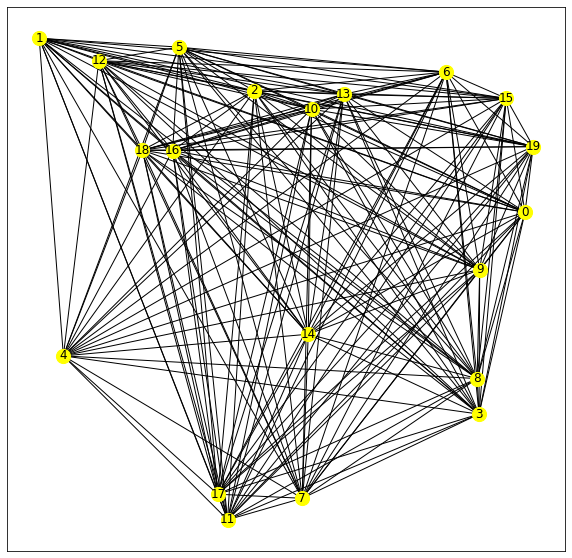

In [5]:
G = generateComTree(20)

In [6]:
def PrimFirst(G):
    n = len(list(G.nodes.keys()))
    V_final = [list(G.nodes.keys())[0]]
    G_final = nx.Graph()

    for _ in range(n-1):
        
        next_edge_weight = float("inf")
        next_edge = None
        for j in V_final:
            for n, w in G.adj.get(j).items():
                if w['weight'] < next_edge_weight and n != j and n not in V_final:
                    next_edge_weight = w['weight']
                    next_edge = (j, n)

        G_final.add_edge(next_edge[0], next_edge[1])
        V_final.append(next_edge[1])
        
    return G_final

CPU times: user 74.8 ms, sys: 38.6 ms, total: 113 ms
Wall time: 83.4 ms


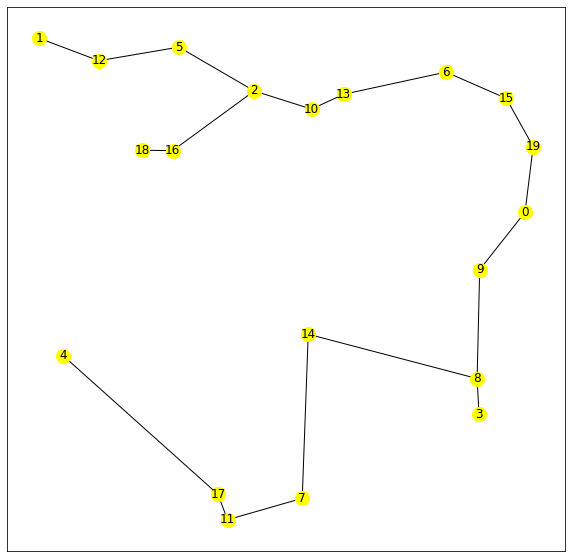

In [7]:
%%time
G_final = PrimFirst(G)
nx.draw_networkx(
    G_final, 
    pos=getPositions(G), 
    node_size=200, 
    label=getLabels(G),
    node_color="yellow"
)

In [8]:
def PrimSecond(G):
    n = len(list(G.nodes.keys()))
    mstSet = set([])
    closeMap = dict.fromkeys(list(range(n)), (None, {'weight': float("inf")}))
    closeMap[0] = sorted(list(G.adj.get(0).items()), key=lambda x: x[1]['weight'])[1]

    G_final = nx.Graph()

    for _ in range(n):

        for n, edge in sorted(closeMap.items(), key=lambda x: x[1][1]['weight']):
            if n not in mstSet:
                mstSet.add(n)
                G_final.add_edge(n, edge[0])
                break

        for v, w in list(G.adj.get(n).items()):
            if v != n and closeMap[v][1]['weight'] > w['weight']:
                closeMap[v] = (n, w)
                
    return G_final

CPU times: user 56.1 ms, sys: 47.4 ms, total: 103 ms
Wall time: 55.4 ms


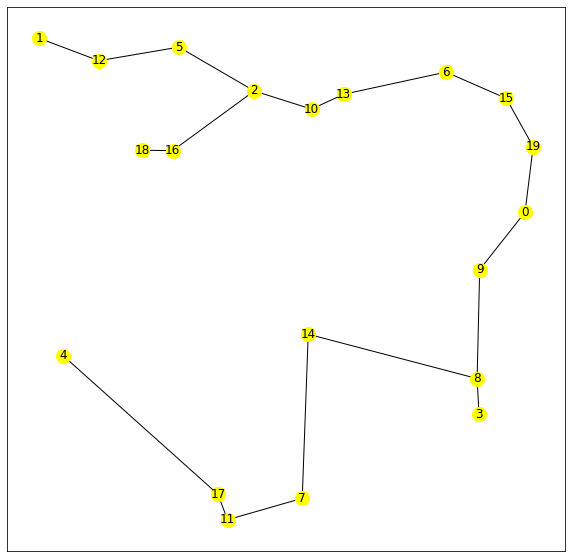

In [9]:
%%time
G_second = PrimSecond(G)
nx.draw_networkx(
    G_second, 
    pos=getPositions(G), 
    node_size=200, 
    label=getLabels(G),
    node_color="yellow"
)

In [10]:
runTimeMap = {
    10: {1:[], 2:[]},
    20: {1:[], 2:[]},
    50: {1:[], 2:[]},
    100: {1:[], 2:[]},
    200: {1:[], 2:[]},
}

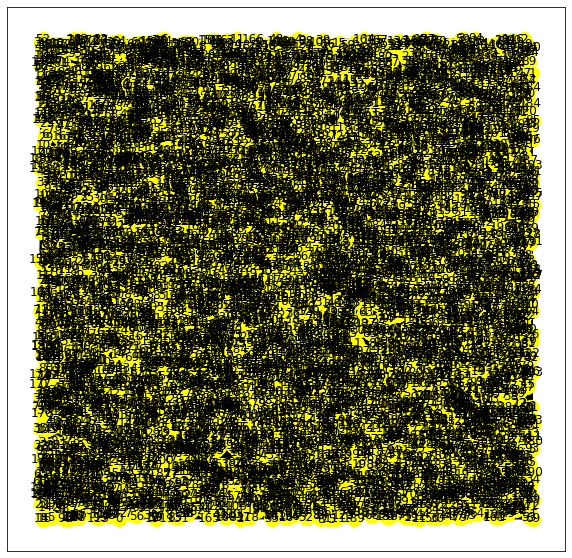

In [12]:
running_times = 20

# Force Not to Show Plots
matplotlib.use("Agg")


for nodeNum in runTimeMap.keys():
    for i in tqdm(range(running_times)):
        
        # generate complete tree
        G = generateComTree(nodeNum)
        
        
        # first version of Prim's Algo
        start_time = time.time()
        G_final = PrimFirst(G)
        end_time = time.time()
        
        runTimeMap[nodeNum][1].append(end_time - start_time)
        saveGraph(
            G_final, getPositions(G), getLabels(G),
            title="First Version of Prim's Algorithm\nNumNodes=%s" % nodeNum,
            path=os.getcwd() + '/plots/firstVer/' + '1st-%s-%s.png' % (nodeNum, i)
        )
        
        
        # second version of Prim's Algo
        start_time = time.time()
        G_final = PrimSecond(G)
        end_time = time.time()
        
        runTimeMap[nodeNum][2].append(end_time - start_time)
        saveGraph(
            G_final, getPositions(G), getLabels(G),
            title="Second Version of Prim's Algorithm\nNumNodes=%s" % nodeNum,
            path=os.getcwd() + '/plots/secondVer/' + '2nd-%s-%s.png' % (nodeNum, i)
        )
        
        
        gc.collect()

In [13]:
dict_of_df = {k: pd.DataFrame(v) for k,v in runTimeMap.items()}
df = pd.concat(dict_of_df, axis=1)

In [14]:
df

10                  20                  50                  100  \
           1         2         1         2         1         2         1   
0   0.000934  0.000435  0.008183  0.000797  0.072394  0.003409  0.470656   
1   0.001157  0.000285  0.004271  0.001031  0.077541  0.003602  0.544846   
2   0.000520  0.000256  0.006917  0.000829  0.136329  0.003596  0.414838   
3   0.001193  0.000264  0.012718  0.000680  0.112638  0.003750  0.422119   
4   0.002016  0.000281  0.009513  0.000844  0.125878  0.003696  0.408424   
5   0.001108  0.000274  0.004294  0.000822  0.067430  0.004723  0.395463   
6   0.001190  0.000428  0.003346  0.000643  0.087955  0.003552  0.432454   
7   0.000684  0.000269  0.005717  0.000803  0.056969  0.003448  0.415052   
8   0.000671  0.000408  0.007715  0.001001  0.069238  0.003468  0.446986   
9   0.003352  0.000286  0.012355  0.000797  0.064315  0.003749  0.425455   
10  0.000816  0.000496  0.007759  0.000787  0.058359  0.003596  0.409425   
11  0.001182  0.000314  0.006729  0.000796  0.076276  0.003477  0.507604   
12  0.003231  0.000303  0.005989  0.000631  0.094978  0.003701  0.483649   
13  0.000862  0.000293  0.006639  0.000796  0.068413  0.003783  0.466722   
14  0.000512  0.000452  0.007238  0.000805  0.064587  0.004040  0.501736   
15  0.002568  0.000260  0.004042  0.000858  0.087811  0.003516  0.426600   
16  0.000974  0.000611  0.006049  0.000636  0.083595  0.003654  0.395754   
17  0.001099  0.000259  0.005496  0.000820  0.108315  0.003565  0.395180   
18  0.000880  0.000278  0.007692  0.000795  0.077724  0.003659  0.426775   
19  0.000534  0.000423  0.008032  0.000828  0.069182  0.003619  0.431480   
20  0.001437  0.000391  0.005806  0.000781  0.092252  0.004276  0.407499   
21  0.001370  0.000256  0.008252  0.000796  0.076762  0.003496  0.447427   
22  0.000751  0.000267  0.007337  0.000629  0.070069  0.003598  0.450713   
23  0.000993  0.000331  0.004979  0.000804  0.080854  0.003554  0.404015   
24  0.003799  0.000394  0.006969  0.000791  0.078543  0.003653  0.410607   

                   200            
           2         1         2  
0   0.028764  3.912642  0.068034  
1   0.014202  4.727607  0.056405  
2   0.013071  3.827411  0.056560  
3   0.016281  3.335384  0.054080  
4   0.013177  3.405936  0.057899  
5   0.013588  3.506729  0.053981  
6   0.013278  3.350965  0.055096  
7   0.013001  3.292507  0.054448  
8   0.013309  3.269479  0.055134  
9   0.013169  3.242812  0.056122  
10  0.013330  3.239330  0.054793  
11  0.018412  3.680846  0.054757  
12  0.016648  3.049756  0.055409  
13  0.017233  3.332921  0.064708  
14  0.015170  3.615131  0.058058  
15  0.013731  3.363034  0.055248  
16  0.022269  3.428301  0.055957  
17  0.014025  3.251545  0.053963  
18  0.013623  3.315681  0.054054  
19  0.013698  3.266026  0.053928  
20  0.013351  4.366930  0.067915  
21  0.013893  3.571728  0.053333  
22  0.013251  3.287095  0.054529  
23  0.013665  3.259691  0.055576  
24  0.013355  3.267821  0.057904

In [40]:
meanDF = df.mean(axis=0).reset_index()
meanDF.columns = ['NumOfNodes', 'Vers', 'RunningTime']
pd.merge(
    meanDF.loc[meanDF['Vers'] == 1], 
    meanDF.loc[meanDF['Vers'] == 2], 
    left_on='NumOfNodes',
    right_on='NumOfNodes',
)

,NumOfNodes,Vers_x,RunningTime_x,Vers_y,RunningTime_y
0,10,1,0.001353,2,0.000341
1,20,1,0.006962,2,0.000792
2,50,1,0.082336,2,0.003687
3,100,1,0.437659,2,0.015100
4,200,1,3.486692,2,0.056716


Text(0, 0.5, 'second')

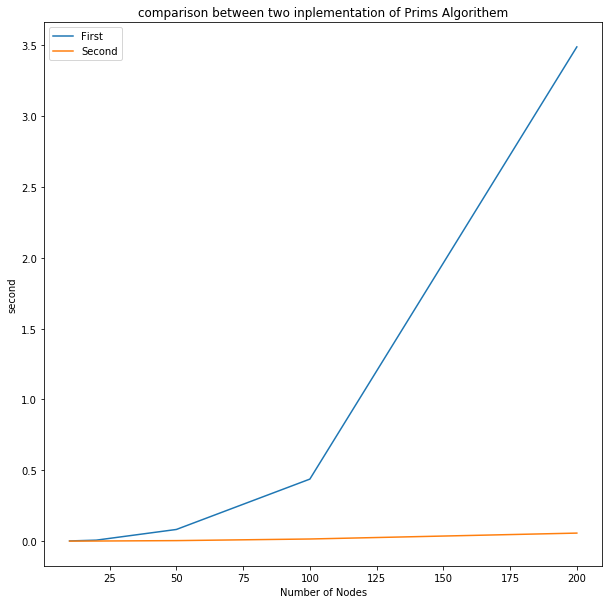

In [34]:
plt.plot(
    meanDF.loc[meanDF['Vers'] == 1]['NumOfNodes'],
    meanDF.loc[meanDF['Vers'] == 1]['RunningTime'],
    label='First'
)
plt.plot(
    meanDF.loc[meanDF['Vers'] == 2]['NumOfNodes'],
    meanDF.loc[meanDF['Vers'] == 2]['RunningTime'],
    label='Second'
)
plt.legend()
plt.title('comparison between two inplementation of Prims Algorithem')
plt.xlabel('Number of Nodes')
plt.ylabel('second')